* CS 224n으로도 유명한 Manning 교수가 이끌고 있는 Stanford NLP group에서 작성한 논문
* 이 논문에 제시한 Neural Machine Translation 모델은 Attention Mechanism 기반의 모델로서 당시 몇몇 Task에서 State-of-the-art를 보여주는 놀라운 성과를 보여주었다.
*  다른 분야에서 각광받던 Attention Mechanism을 저자의 말에 따르면 NMT에 처음으로 적용한 사례였고 놀라운 결과와 분석을 통하여 NMT에서의 Attention Mechanism의 시작을 알렸다고 할 수 있을 것 같다.
* 논문에서는 Global approach 과 Local approach 두가지 방식을 소개하면서 Bahdanau attetion보다 성능이 좋으면서 연산과정은 더 간단함을 보이고 있다.
* 특히 Local approach 방식의 경우, window기반과 확률적 방식을 도입해서 성능을 높이면서 Global approach보다 attention연산이 더 간단하게 된 것이 인상적이였다.

* Local approach에 사용한 gaussian 확률적 방법은 논문에서 자세히 설명이 안돼서 아쉬웠다.


 * 우선, NMT에 대해서 잠깐 짚고 넘어가자.
 *  그동안 많이 봤듯이, NMT에 있어서 가장 널리 쓰이는 Sequence to Sequence의 기본적인 구조는 다음 Figure와 같으며 주요 계산은 다음 3단계로 구분할 수 있다.



* Encoder에서 Source sequence를 차례대로 계산

* ->
* 한 Input Sequence에 대한 Context vector를 계산


* ->
* Decoder에서 이를 바탕으로 Target sequence를 계산

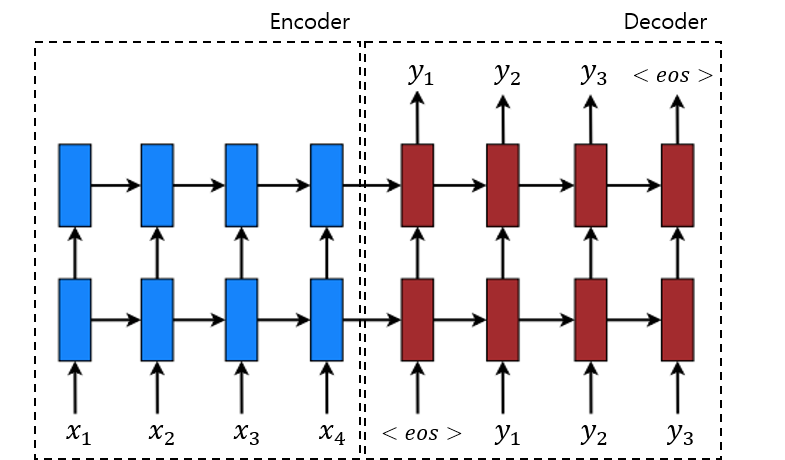

### 인코더 (Encoder) 부분
* 각 블록은 입력 시퀀스의 각 요소를 나타내며, 이 블록들은 서로 연결되어 있어 이전 단계의 출력을 다음 단계의 입력으로 사용합니다.
* 마지막 인코더 블록의 출력은 디코더의 첫 번째 블록에 전달됩니다.
* 인코더 (Encoder): 입력 시퀀스를 처리하여 숨겨진 상태 벡터 시퀀스를 생성합니다.


### 디코더 (Decoder) 부분
* 디코더의 첫 번째 입력은 특별한 eos 토큰입니다. 이 토큰은 시퀀스의 끝을 나타내며, 인코더의 마지막 출력을 사용합니다.
* 디코더는 또한 자신의 이전 출력을 다음 입력으로 사용합니다. 예를 들어, y1의 출력을 사용하여 y2를 생성하고, y2의 출력을 사용하여 y3을 생ㅇ성 합니다.
* 최종 출력은 eos 토큰으로 끝납니다.
* 디코더 (Decoder): 컨텍스트 벡터와 이전 출력 상태를 사용하여 다음 단어를 생성합니다.

이 모델은 일반적으로 두 개의 순환 신경망 (RNN)으로 구성되며, 입력 시퀀스를 고정된 크기의 벡터로 인코딩한 다음, 이 벡터를 사용하여 출력 시퀀스를 디코딩합니다. 이 과정은 기계 번역, 텍스트 생성 등의 다양한 자연어 처리 작업에 매우 유용합니다.

  Context vector는 Source sequence의 정보를 하나의 vector에 담고 있는 것으로 볼 수 있는데 이는 그동안의 모델에서는 Decoder의 첫 hidden state를 계산할 때만 사용되었다. 이 접근 방식은 구조를 간단하게 만들 수는 있지만 Source와 Target의 관련성을 이용하는 Alignment 측면에서는 몇가지 문제점이 생각된다. 먼저, Context vector를 처음에만 사용하기에 나중 Target symbol을 계산함에 있어서는 충분히 정보가 반영되지 않을 수 있다. 그리고 무엇보다 Source와 Target의 관계는 symbol마다 다르기 때문에 고정된 Context vector를 사용하는 것은 제대로된 context를 전달해주지 못할 수 있다.

  이러한 문제들을 해결하는 것이 Attention Mechanism인데 저자들은 이를 적용하기 위해 LSTM으로 Encoder Decoder를 구성하고 Decoder에서 target symbol을 계산하기 위해 각 Decoder의 hidden state와 함께 현재 target과 관련된 정보들을 충분히 담고 있는 context vector를 계산하여 사용했다. 이는 계산량은 늘었을지는 몰라도 Decoder에서 각 state에 맞는 source sentence의 정보를 반영할 수 있는 해결책이었다. 다음 수식을 통해 조금 더 자세히 살펴보자.

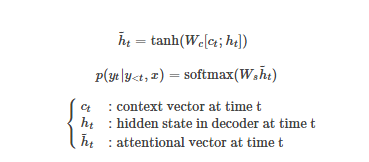

 수식에서는 딱 한 가지만 주목하면 되는데, h~t
를 계산할 때 각 state에 따라 다른 context vector를 사용한다는 점이다. 이 차이점은 Target symbol들과 Source symbol들간의 alignment를 적용할 수 있게 해주었으며 충분히 Source의 context를 전달할 수 있게 해주었다. 이 아이디어를 기반으로 하여 제시된 모델은 총 2가지로 각각은 context vector를 계산할 때 어느정도 범위의 Source sentence를 사용하는지에 있어 차이를 보인다.

* Global Attention : 모든 Source 단어들을 고려한다.
* Local Attention : 특정 영역의 한정된 숫자의 단어들을 고려한다.

### Global Attention
  * Global Attention은 특정 target symbol과 source와의 alignment를 계산함에 있어 다음 Figure에서 볼 수 있듯이 전체 source를 사용한다. alignment되는 정도는 다음의 식을 통해 계산되는데, 저자들은 가장 기본적인 location 방법 이외에 총 3가지의 방법을 이용하여 score를 계산하였다.

* 첫 번째는 Global 방식으로 모든 단어를 고려하는 모델
* 두 번째는 local 방식으로 한 번에 한 집단의 단어무리들을 고려하는 모델 입니다.
* 두 번째 방식은 첫 번째 방식보다 가볍고, 모델을 돌리기 쉽습니다.
*그리고 사용하는 함수가 미분이 가능하여, 역전파 계산에도 굉장히 효율적입니다.

### Attention -based Model
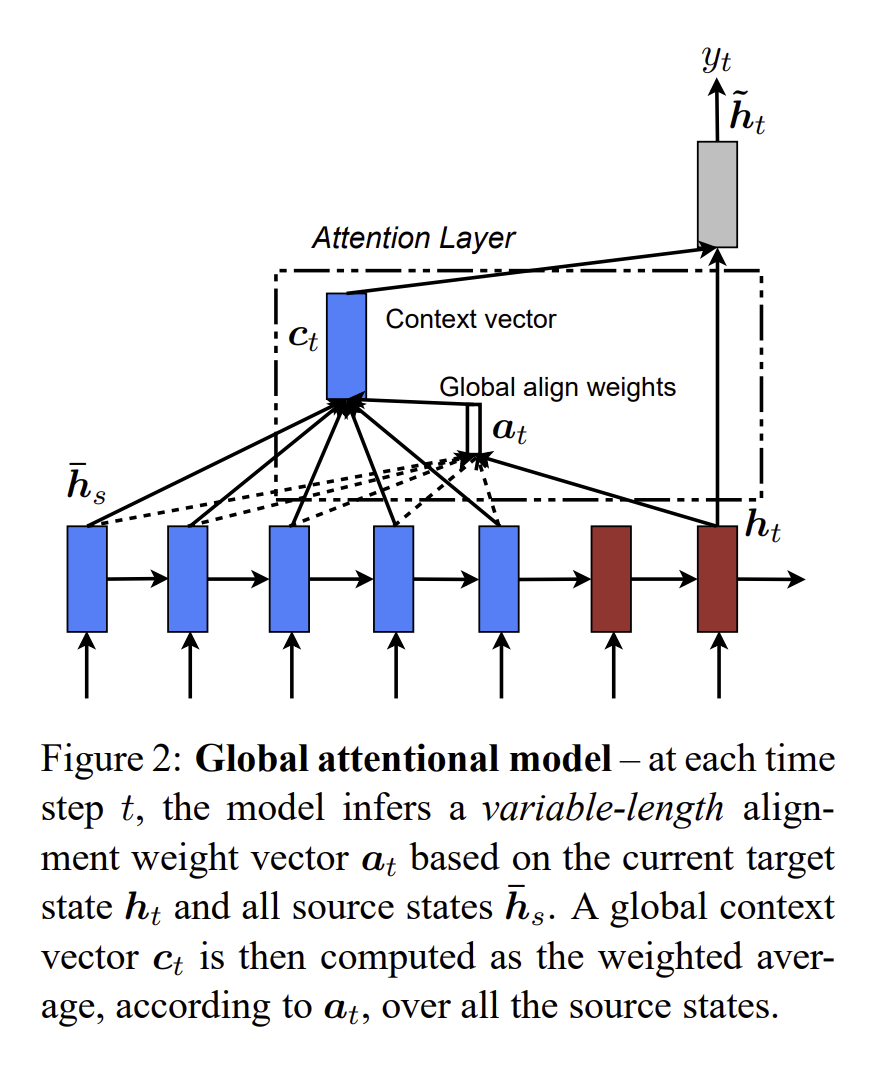


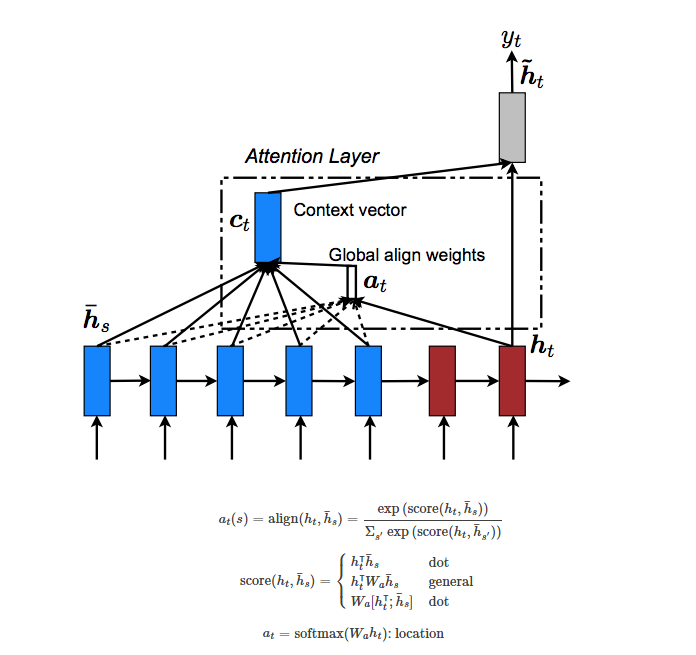

여기서 얻어지는 alignment vector는 후에 context vector ct
를 계산하기 위해서 source의 각 hidden state ht
에 대한 weighted factor로 적용된다. 즉, 현재 target에 대한 average context로 볼 수 있겠다.

ct=Σihiai
  저자가 추가적으로 언급하였듯이 이 모델과 2015년 Bahdanau가 제시한 모델과 비슷해보일 수 있지만, Bahdanau보다 간단히 top layer의 hidden state를 사용하였으며 이전 hidden state가 아니라 현재 hidden state를 사용하여 보다 간단하고 일반화되어있다는 점에서 차별화를 둘 수 있겠다.

### Local Attention
 *  Global Attention는 항상 Source 전체를 계산해야하기 때문에 Paragraph와 같이 깉 문서일 수록 Compuational Cost가 커진다. 이를 해결하기 위해서 제시된 두번째 모델 Local Attention은 다음 Figure처럼 Source의 일부분만을 이용하여 alignment를 계산한다. 이는 Xu가 제안한 soft and hard attention으로부터 영향을 받은 것으로 alignment position을 계산하여 주변 값만을 사용한다.

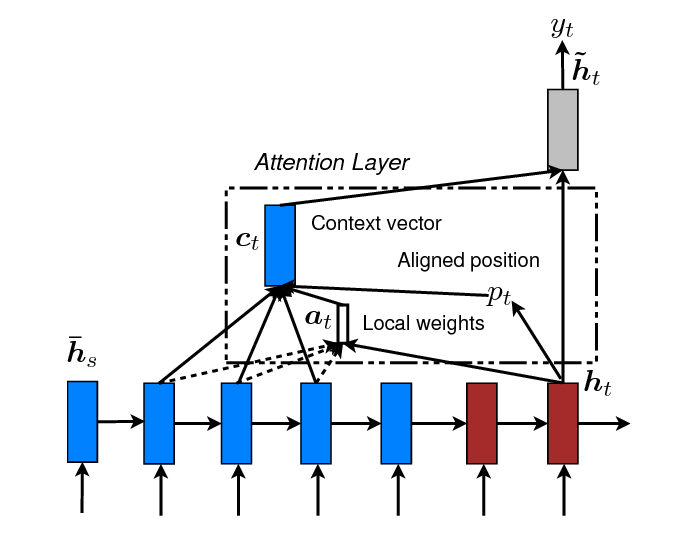

 alignment position을 계산하기 위해서 저자는 2가지 방법을 제시하였다. 첫번째는 monotonic alignment로 source와 target 단어의 순서가 비슷하다고 보는 것이며, 두번째는 predictive alignment로 다음의 식을 통해서 계산한다. sigmoid의 결과값은 항상 0 에서 1이므로 alignment point가 0~S임을 알 수 있다.

 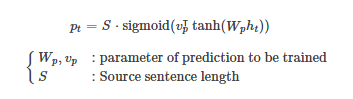

위에서 구한 alignment point를 기준으로 alignment vector를 계산하는데, 이는 global attention 때와 같은 align 함수에 point를 중심으로 주변의 gaussian distribution을 곱해서 구해낸다. 이 접근 방법은 좋은 성능을 보여주었던 2015년 Gregordml 모델이 image generation에서 사용한 target을 중심으로 한 zoom과 비슷하게도 볼 수 있다.
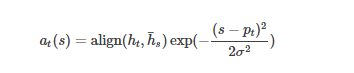

## Input-feeding Approach

마지막으로 저자가 사용한 테크닉은 다음 Figure처럼 attention layer를 encoder와 decoder에 걸쳐 적용하는 것이었다. 이 방법을 적용한 목적은 이전에 어떤 align이 된지에 대한 정보까지 뒤의 decoding 과정에 적용하는 것이며 또한 수평, 수직으로 길게 확장되는 네트워크를 만들기 위함이라고 한다. 심플하면서도 의도한 바를 적용하기 위한 좋은 방법으로 보인다.

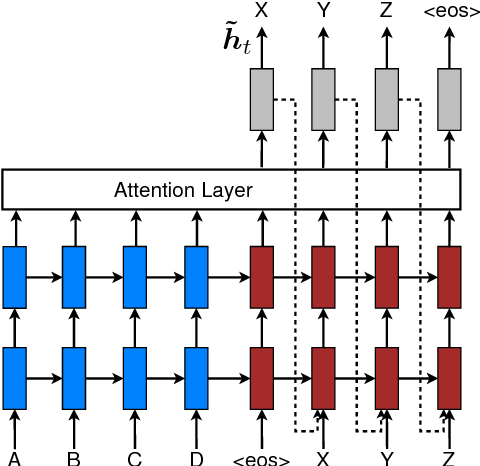

### Experimental Setup

 * Dataset : WMT English-German을 사용하였으며 newstest2013이 development set으로 사용되었다. 각 언어에서 빈번하게 사용되는 50,000개의 단어를 사용하였고, 여기 포함되지 않은 단어들은 [UNK] Token 처리되었다.

### Result

 결과 비교는 WMT ‘14와 WMT ‘15를 사용하였는데, 결과가 굉장히 인상적이다. WMT ‘14, WMT ‘15 English to German에서는 Best result가 기존 SOTA system을 능가하는 모습을 보여주었고 Attention을 포함한 여러 가지 테크닉을 하나씩 적용함에 따라 증가하는 점수들을 일일히 보여주고 있다. (첫번째 표는 WMT’14, 두번째 표는 WMT’15이다.)

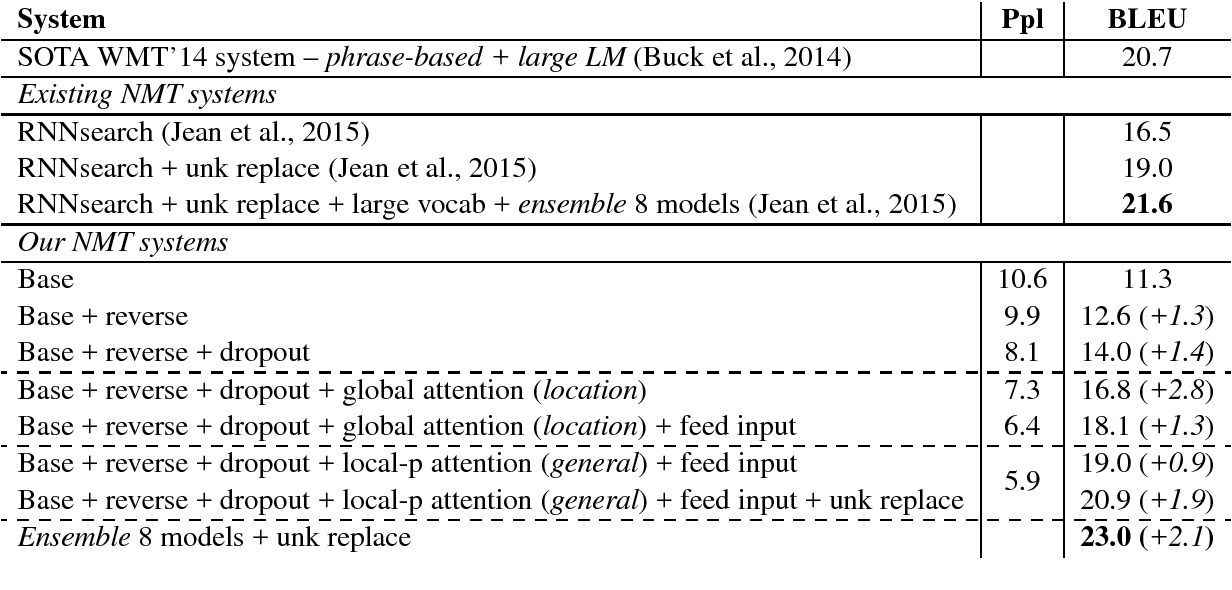

WMT ‘15 German to English에서는 기존 SOTA만큼은 아니지만 그 만큼의 점수를 보여주었다.

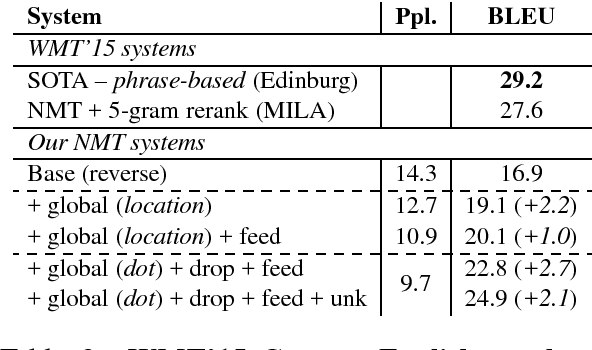

 결과를 비교하는 것 이외에도 저자는 newstest2014를 이용한 Learning Curve 분석, Long sentence에 대한 BLEU, Attentional Architecture 그리고 Alignment quality에 대한 분석을 수행하였다.

### Conclusion

이 논문에서 저자는 기존의 Attention Mechanism을 적용한 2가지 종류의 모델을 제시하였으며 그 결과는 기존 SOTA를 능가하거나 근접하여 굉장히 성공적이었다. 전체 Source sentence를 참고하는 global attention과 일부분을 보는 local attention 중 결과적으로 local attention이 더 좋은 성능을 보여주었는데, 이는 전체 sentence를 계산할 때 source에서 중요한 부분이 상대적으로 덜 반영됬기 때문으로 생각된다.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 입력 문장 리스트
input_texts = [
    "I am a student",
    "How are you?",
    "What is your name?",
    "Where do you live?",
    "I like to play football",
    "She loves reading books",
    "We are going to the park",
    "Do you speak English?",
    "I need some help",
    "Can you help me?"
]

# 대응하는 출력 문장 리스트 (시작과 끝 토큰 포함)
target_texts = [
    "<start> Je suis étudiant <end>",
    "<start> Comment ça va? <end>",
    "<start> Quel est votre nom? <end>",
    "<start> Où habitez-vous? <end>",
    "<start> J'aime jouer au football <end>",
    "<start> Elle aime lire des livres <end>",
    "<start> Nous allons au parc <end>",
    "<start> Parlez-vous anglais? <end>",
    "<start> J'ai besoin d'aide <end>",
    "<start> Pouvez-vous m'aider? <end>"
]

# 토크나이저 정의 및 텍스트를 시퀀스로 변환
num_encoder_tokens = 100 # 인코더 토큰의 수
num_decoder_tokens = 100 # 디코더 토큰의 수

# 입력 텍스트를 시퀀스로 변환하기 위한 토크나이저
tokenizer_inp = Tokenizer(num_words=num_encoder_tokens, filters='')
tokenizer_tar = Tokenizer(num_words=num_decoder_tokens, filters='')

# 토크나이저에 텍스트 학습
tokenizer_inp.fit_on_texts(input_texts)
tokenizer_tar.fit_on_texts(target_texts)

# 텍스트를 시퀀스로 변환
input_sequences = tokenizer_inp.texts_to_sequences(input_texts)
target_sequences = tokenizer_tar.texts_to_sequences(target_texts)

# 최대 시퀀스 길이를 계산
max_encoder_seq_length = max([len(txt) for txt in input_sequences])
max_decoder_seq_length = max([len(txt) for txt in target_sequences])

# 시퀀스 패딩 (길이를 맞추기 위해)
input_sequences = pad_sequences(input_sequences, maxlen=max_encoder_seq_length, padding='post')
target_sequences = pad_sequences(target_sequences, maxlen=max_decoder_seq_length, padding='post')

# 원-핫 인코딩을 위한 초기화
encoder_input_data = np.zeros((len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype='float32')
decoder_input_data = np.zeros((len(target_texts), max_decoder_seq_length, num_decoder_tokens), dtype='float32')
decoder_target_data = np.zeros((len(target_texts), max_decoder_seq_length, num_decoder_tokens), dtype='float32')

# 입력과 출력 데이터를 원-핫 인코딩
for i, seq in enumerate(input_sequences):
    for t, token in enumerate(seq):
        encoder_input_data[i, t, token] = 1.0

for i, seq in enumerate(target_sequences):
    for t, token in enumerate(seq):
        decoder_input_data[i, t, token] = 1.0
        if t > 0:
            decoder_target_data[i, t-1, token] = 1.0



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model

latent_dim = 256  # LSTM 은닉 상태의 차원

# 인코더 정의
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True) # LSTM 레이어
encoder_outputs, state_h, state_c = encoder(encoder_inputs) # 출력과 상태
encoder_states = [state_h, state_c] # 상태 저장

# 디코더 정의
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states) # 초기 상태로 인코더의 상태를 사용
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# 모델 컴파일 및 훈련
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size=64, epochs=100, validation_split=0.2)


Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 3.9414 - val_loss: 3.9061
Epoch 2/100
1/1 [==============================] - 0s 84ms/step - loss: 3.9017 - val_loss: 3.8716
Epoch 3/100
1/1 [==============================] - 0s 70ms/step - loss: 3.8656 - val_loss: 3.8304
Epoch 4/100
1/1 [==============================] - 0s 73ms/step - loss: 3.8235 - val_loss: 3.7726
Epoch 5/100
1/1 [==============================] - 0s 75ms/step - loss: 3.7668 - val_loss: 3.6813
Epoch 6/100
1/1 [==============================] - 0s 76ms/step - loss: 3.6799 - val_loss: 3.5213
Epoch 7/100
1/1 [==============================] - 0s 75ms/step - loss: 3.5307 - val_loss: 3.2216
Epoch 8/100
1/1 [==============================] - 0s 74ms/step - loss: 3.2562 - val_loss: 2.7255
Epoch 9/100
1/1 [==============================] - 0s 103ms/step - loss: 2.8339 - val_loss: 2.5062
Epoch 10/100
1/1 [==============================] - 0s 122ms/step - loss: 2.6320 - val_loss: 2.5874
Epoch 11/100
1/1 [=

In [ ]:
# 인코더 모델 정의 (추론용)
encoder_model = Model(encoder_inputs, encoder_states)

# 디코더 모델 정의 (추론용)
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# 시퀀스 디코딩 함수 정의
def decode_sequence(input_seq):
    # 인코더 모델로부터 상태값 예측
    states_value = encoder_model.predict(input_seq)

    # 목표 시퀀스 시작 토큰 초기화
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    target_seq[0, 0, tokenizer_tar.word_index['<start>']] = 1.0

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        # 디코더 모델로 예측
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # 가장 높은 확률의 토큰 선택
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = tokenizer_tar.index_word[sampled_token_index]
        decoded_sentence += ' ' + sampled_word

        # 종료 조건 확인
        if (sampled_word == '<end>' or len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # 목표 시퀀스 업데이트
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.0

        # 상태 업데이트
        states_value = [h, c]

    return decoded_sentence.replace('<start>', '').replace('<end>', '').strip()

# 입력 문장 번역
for seq_index in range(len(input_texts)):
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)


1/1 [==============================] - 0s 24ms/step
-
Input sentence: I am a student
Decoded sentence: je suis
1/1 [==============================] - 0s 25ms/step
-
Input sentence: How are you?
Decoded sentence: comment
1/1 [==============================] - 0s 24ms/step
-
Input sentence: What is your name?
Decoded sentence: quel est
1/1 [==============================] - 0s 26ms/step
-
Input sentence: Where do you live?
Decoded sentence: où habitez-vous?
1/1 [==============================] - 0s 24ms/step
-
Input sentence: I like to play football
Decoded sentence: j'aime jouer
1/1 [==============================] - 0s 24ms/step
-
Input sentence: She loves reading books
Decoded sentence: elle aime
1/1 [==============================] - 0s 24ms/step
-
Input sentence: We are going to the park
Decoded sentence: nous allons
1/1 [==============================] - 0s 30ms/step
-
Input sentence: Do you speak English?
Decoded sentence: parlez-vous
1/1 [==============================] - 0s 39ms